In [144]:
%load_ext autoreload
%autoreload 2
from utils import *
from IPython.display import display, HTML
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#CollectASECount()
#SEVERE_IMPACT=SYNONYMOUS_VARIANT;SEVERE_GENE=ENSG00000057252;SEVERE_GENE_NAME=SOAT1

In [3]:
GTEX_ASE = pd.read_csv("data/GTEX_ASE.Anno.tsv", delimiter="\t")

In [4]:
set(GTEX_ASE["SEVERE_IMPACT"].values)
LGDs = ['FRAMESHIFT_VARIANT', 'SPLICE_ACCEPTOR_VARIANT', 'SPLICE_DONOR_VARIANT', 'STOP_GAINED']

In [5]:
GTEX_ASE_LGD = GTEX_ASE[GTEX_ASE["SEVERE_IMPACT"].isin(LGDs)]
GENES_WITH_LGD = set(GTEX_ASE_LGD["SEVERE_GENE_NAME"].values)
GTEX_ASE_SYN = GTEX_ASE[(GTEX_ASE["SEVERE_IMPACT"]=="SYNONYMOUS_VARIANT") & 
                        (GTEX_ASE["SEVERE_GENE_NAME"].isin(GENES_WITH_LGD))]

In [6]:
GTEX_ASE_LGD.to_csv("NMD_model/GTEx.ASE.LGD.tsv", index=False, sep="\t")
GTEX_ASE_SYN.to_csv("NMD_model/GTEX_ASE.SYN.tsv", index=False, sep="\t")

In [7]:
Samples = pd.read_csv("../data/GTEx/GTEx_v7_Annotations_SampleAttributesDS.txt", delimiter="\t")

In [8]:
Samples.head(2)

,SAMPID,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
0,GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,13756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GTEX-1117F-0003-SM-5DWSB,NaN,B1,NaN,NaN,Blood,Whole Blood,13756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
print(sorted(list(set(Samples["SMTS"].values))))

['Adipose Tissue', 'Adrenal Gland', 'Bladder', 'Blood', 'Blood Vessel', 'Bone Marrow', 'Brain', 'Breast', 'Cervix Uteri', 'Colon', 'Esophagus', 'Fallopian Tube', 'Heart', 'Kidney', 'Liver', 'Lung', 'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Pituitary', 'Prostate', 'Salivary Gland', 'Skin', 'Small Intestine', 'Spleen', 'Stomach', 'Testis', 'Thyroid', 'Uterus', 'Vagina']


In [56]:
print(sorted(list(set(Samples["SMTSD"].values))))

['Adipose - Subcutaneous', 'Adipose - Visceral (Omentum)', 'Adrenal Gland', 'Artery - Aorta', 'Artery - Coronary', 'Artery - Tibial', 'Bladder', 'Brain - Amygdala', 'Brain - Anterior cingulate cortex (BA24)', 'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere', 'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)', 'Brain - Hippocampus', 'Brain - Hypothalamus', 'Brain - Nucleus accumbens (basal ganglia)', 'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)', 'Brain - Substantia nigra', 'Breast - Mammary Tissue', 'Cells - EBV-transformed lymphocytes', 'Cells - Leukemia cell line (CML)', 'Cells - Transformed fibroblasts', 'Cervix - Ectocervix', 'Cervix - Endocervix', 'Colon - Sigmoid', 'Colon - Transverse', 'Esophagus - Gastroesophageal Junction', 'Esophagus - Mucosa', 'Esophagus - Muscularis', 'Fallopian Tube', 'Heart - Atrial Appendage', 'Heart - Left Ventricle', 'Kidney - Cortex', 'Liver', 'Lung', 'Minor Salivary Gland', 'Muscle - Ske

In [9]:
for i, row in Samples.iterrows():
    SAMPID = row["SAMPID"]
    DONER = SAMPID.split("-")[1]
    SMTS = row["SMTS"]
    SMTSD = row["SMTSD"]

In [10]:
GTEX_ASE_LGD.head()

,SAMPLE,ID,INFO,NREF,NALT,SEVERE_IMPACT,SEVERE_GENE,SEVERE_GENE_NAME
52,GTEX-T6MN-0226-SM-5S2SO,snp_7_100552738,7_100552738_C_T,8,0,STOP_GAINED,ENSG00000169894,MUC3A
99,GTEX-S32W-0326-SM-5S2T4,snp_8_52733231,8_52733231_G_A,36,0,STOP_GAINED,ENSG00000168300,PCMTD1
182,GTEX-S32W-0726-SM-5S2T3,snp_8_52733231,8_52733231_G_A,23,0,STOP_GAINED,ENSG00000168300,PCMTD1
312,GTEX-S32W-2226-SM-5S2S7,snp_8_52733231,8_52733231_G_A,8,0,STOP_GAINED,ENSG00000168300,PCMTD1
451,GTEX-WFON-0426-SM-5S2T1,snp_21_44323720,21_44323720_C_T,13,12,STOP_GAINED,ENSG00000160194,NDUFV3


In [11]:
GENES_WITH_LGD = list(GENES_WITH_LGD)
print(len(GENES_WITH_LGD))

1543


In [46]:
GTEX_ASE_SYN.head()

,SAMPLE,ID,INFO,NREF,NALT,SEVERE_IMPACT,SEVERE_GENE,SEVERE_GENE_NAME
10,GTEX-T6MN-0226-SM-5S2SO,snp_12_53647177,12_53647177_T_G,12,0,SYNONYMOUS_VARIANT,ENSG00000182544,MFSD5
11,GTEX-T6MN-0226-SM-5S2SO,snp_12_53647373,12_53647373_T_C,14,8,SYNONYMOUS_VARIANT,ENSG00000182544,MFSD5
18,GTEX-T6MN-0226-SM-5S2SO,snp_2_29092679,2_29092679_T_C,18,37,SYNONYMOUS_VARIANT,ENSG00000171103,TRMT61B
19,GTEX-T6MN-0226-SM-5S2SO,snp_2_29092850,2_29092850_G_T,21,42,SYNONYMOUS_VARIANT,ENSG00000171103,TRMT61B
22,GTEX-T6MN-0226-SM-5S2SO,snp_2_135711516,2_135711516_C_T,34,44,SYNONYMOUS_VARIANT,ENSG00000082258,CCNT2


In [69]:
SYN_ADPS = TissueGeneMut(GTEX_ASE_SYN, Samples, "Adipose Tissue")

In [75]:
len(SYN_ADPS.keys())

1019

In [77]:
print(GTEX_ASE_SYN[GTEX_ASE_SYN["SEVERE_GENE"]=="ENSG00000234745"].shape)

(5870, 8)


In [111]:
Count = 0
ADPS_genes = []
for gene, Vars in SYN_ADPS.items():
    SYNs = set([])
    INDVs = set([])
    for var in Vars:
        SYNs.add(var.id)
        INDVs.add(var.sample)
    #print(len(SYNs), len(INDVs))
    if len(SYNs) >= 4 and len(INDVs) >= 10:
        Count += 1
        #print(gene, len(SYNs), len(INDVs))
        ADPS_genes.append([gene, len(SYNs), len(INDVs)])
print(Count)

311


In [73]:
# Compare to Andy
Andy_ADPSBQ = pd.read_csv("NMD_model/TissueASE/ADPSBQ.csv")
Andy_ADPSBQ_keep = Andy_ADPSBQ[(Andy_ADPSBQ["nvar"]>=4)&(Andy_ADPSBQ["nobs"]>=10)]
Andy_ADPSBQ_keep.shape

(3917, 7)

In [113]:
Andy_ADPS_genes = []
for i, gene in enumerate([x for x,y,z in ADPS_genes]):
    row = Andy_ADPSBQ_keep[Andy_ADPSBQ_keep["gene"]==gene]
    #print(row["nvar"].values[0], row["nobs"].values[0])
    Andy_ADPS_genes.append([gene, row["nvar"].values[0], row["nobs"].values[0]])
    if ADPS_genes[i][1] == row["nvar"].values[0] and ADPS_genes[i][2] == row["nobs"].values[0]:
        print(ADPS_genes[i])

['ENSG00000167930', 4, 36]
['ENSG00000089159', 4, 17]
['ENSG00000116016', 4, 16]
['ENSG00000135917', 4, 12]
['ENSG00000131473', 4, 31]


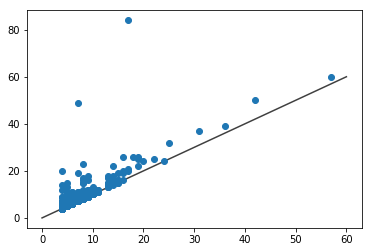

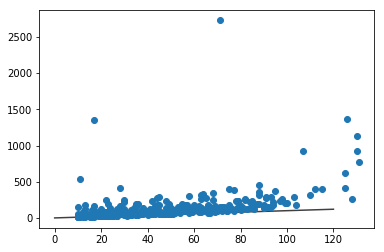

In [107]:
plt.scatter([y for x,y,z in ADPS_genes], [y for x,y,z in Andy_ADPS_genes])
plt.plot((0,60), (0,60), 'k-', alpha=0.75, zorder=0)
plt.show()
plt.scatter([z for x,y,z in ADPS_genes], [z for x,y,z in Andy_ADPS_genes])
plt.plot((0,120), (0,120), 'k-', alpha=0.75, zorder=0)
plt.show()

In [104]:
SYN_SKIN = TissueGeneMut(GTEX_ASE_SYN, Samples, "Skin")
Count = 0
SKIN_genes = []
for gene, Vars in SYN_SKIN.items():
    SYNs = set([])
    INDVs = set([])
    for var in Vars:
        SYNs.add(var.id)
        INDVs.add(var.sample)
    #print(len(SYNs), len(INDVs))
    if len(SYNs) >= 4 and len(INDVs) >= 10:
        Count += 1
        #print(gene, len(SYNs), len(INDVs))
        SKIN_genes.append([gene, len(SYNs), len(INDVs)])
print(Count)

329


In [105]:
Andy_SKIN = pd.read_csv("NMD_model/TissueASE/SKINS.csv")
Andy_SKIN_keep = Andy_SKIN[(Andy_SKIN["nvar"]>=4)&(Andy_SKIN["nobs"]>=10)]
Andy_SKIN_genes = []
for gene in [x for x,y,z in SKIN_genes]:
    row = Andy_SKIN_keep[Andy_SKIN_keep["gene"]==gene]
    #print(row["nvar"].values[0], row["nobs"].values[0])
    Andy_SKIN_genes.append([gene, row["nvar"].values[0], row["nobs"].values[0]])

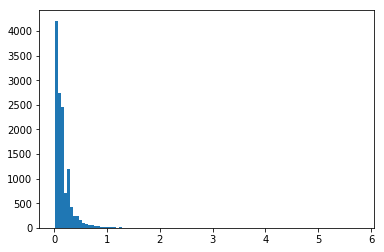

5.773502691896257


In [178]:
#Andy_SKIN["pseudoVar"] = 1/math.sqrt(Andy_SKIN["ahat"]+Andy_SKIN["bhat"])
pseudoVar = []
for i, row in Andy_SKIN.iterrows():
    a, b = row["ahat"], row["bhat"]
    pseudoVar.append(1/math.sqrt(a+b))
plt.hist(pseudoVar,bins=100)
plt.show()
print(max(pseudoVar))

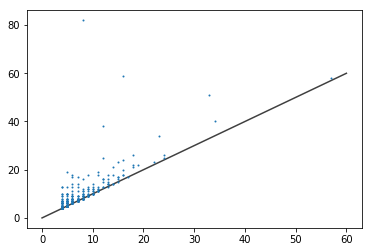

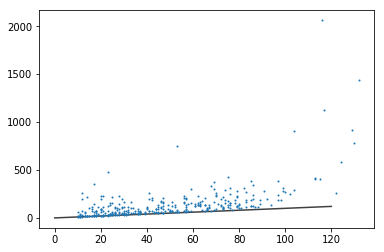

In [110]:
plt.scatter([y for x,y,z in SKIN_genes], [y for x,y,z in Andy_SKIN_genes], s=1)
plt.plot((0,60), (0,60), 'k-', alpha=0.75, zorder=0)
plt.show()
plt.scatter([z for x,y,z in SKIN_genes], [z for x,y,z in Andy_SKIN_genes], s=1)
plt.plot((0,120), (0,120), 'k-', alpha=0.75, zorder=0)
plt.show()

In [117]:
print(SYN_ADPS["ENSG00000167930"])

[<utils.ASEVar object at 0x1c224b79e8>, <utils.ASEVar object at 0x1c23d62940>, <utils.ASEVar object at 0x1c23d63f60>, <utils.ASEVar object at 0x1c23d6c7b8>, <utils.ASEVar object at 0x1c24222a90>, <utils.ASEVar object at 0x1c23d792e8>, <utils.ASEVar object at 0x1c23d94908>, <utils.ASEVar object at 0x1c241dec50>, <utils.ASEVar object at 0x1c24217048>, <utils.ASEVar object at 0x1c2412c2e8>, <utils.ASEVar object at 0x1c2412f748>, <utils.ASEVar object at 0x1c24156898>, <utils.ASEVar object at 0x1c23ca13c8>, <utils.ASEVar object at 0x1c23cce2e8>, <utils.ASEVar object at 0x1c248d7fd0>, <utils.ASEVar object at 0x1c249fcd30>, <utils.ASEVar object at 0x1c24936828>, <utils.ASEVar object at 0x1c22daf2e8>, <utils.ASEVar object at 0x1c22dd7a90>, <utils.ASEVar object at 0x1c24da5a58>, <utils.ASEVar object at 0x1c24dbc358>, <utils.ASEVar object at 0x1c24dd4a90>, <utils.ASEVar object at 0x1c22f729b0>, <utils.ASEVar object at 0x1c23145dd8>, <utils.ASEVar object at 0x1c232a5f60>, <utils.ASEVar object at 

In [141]:
a_b_q = SamplingAlphaBeta()

In [152]:
len(a_b_q)

998001

In [170]:
genedat = SYN_ADPS["ENSG00000167930"]
#max_posteriori, _alpha, _beta = GridSearchASE(a_b_q, genedat)

In [181]:
a = 235.48; b = 273.18;
a = 83; b = 95;
post = ComputeLikelihood(genedat, a, b, math.log(scipy.stats.halfcauchy.pdf(1/math.sqrt(a+b))))
print(post)

-117.76615496057406


In [172]:
a = 20; b = 20;
post = ComputeLikelihood(genedat, a, b, math.log(scipy.stats.halfcauchy.pdf(1/math.sqrt(a+b))))
print(post)

-112.8556488790238


In [168]:
#_alpha, _beta
#a = 235.48; b = 273.18;
mean = scipy.stats.beta.mean(a,b)
var = scipy.stats.beta.std(a,b)
print(a, b, mean, var)

20 20 0.5 0.07808688094430304


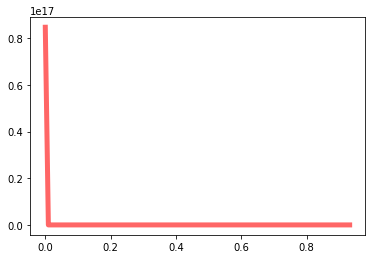

In [133]:
from scipy.stats import beta
fig, ax = plt.subplots(1, 1)
a, b = 0.1,0.9
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')

In [18]:
P = 1e-6
Q = math.log10(P)

In [19]:
Q

-6.0

In [180]:
scipy.stats.halfcauchy.cdf(2)
scipy.stats.halfcauchy.cdf(6)

0.8948630865774932

In [24]:
2 ** 2

4

In [26]:
print(reparameter(0.459147,0.142321))

(22.668029953424497, 26.701844952486894)


In [34]:
mu = lambda a,b : a/(a+b)
sigma = lambda a,b :1/math.sqrt(a+b)

In [36]:
print(mu(5.17, 6.09), sigma(5.17, 6.09))
print(mu(15.53,30.16), sigma(15.53,30.16))

0.4591474245115453 0.29800997754107494
0.3398993215145546 0.1479412967049349


In [39]:
scipy.stats.beta.std(15.53,30.16)

0.06932155585067272

In [42]:
scipy.stats.uniform.logpdf(0.5)

0.0